In [105]:
# Obtaining the list of ingredients for each recipe. Only interested
# in the ingredients, and so I've stripped the other information such as URL
import json

with open('combinedRecipes.JSON') as recipes:
    data = json.load(recipes)
# print(data)

ingrs_per_recipe = []
for obj in data:
    ingrs_per_recipe.append(obj["ingredients"])
print(ingrs_per_recipe)

[['clove', 'cloves', 'garlic', 'cumin', 'tea', 'pepper', 'oregano', 'orange', 'oranges', 'lime', 'limes', 'olive', 'olive oil', 'salt', 'pork', 'mint', 'bean', 'beans', 'black bean', 'black beans', 'rice'], ['ponzu', 'shallot', 'mustard', 'olive', 'olive oil', 'wasabi', 'steak', 'tea', 'cucumber', 'salt'], ['rice', 'rice vinegar', 'vinegar', 'lemon', 'lime', 'lime juice', 'soy sauce'], ['paprika', 'brown sugar', 'sugar', 'salt', 'mustard', 'seed', 'garlic', 'garlic powder', 'onion', 'onion powder', 'oregano', 'coriander', 'cumin', 'tea', 'pepper', 'red pepper', 'red pepper flakes', 'ketchup', 'molasses', 'worcestershire sauce', 'apple', 'apple cider vinegar', 'cider', 'vinegar', 'pork'], ['flour', 'sugar', 'salt', 'tea', 'butter', 'water'], ['pepper', 'poblano', 'poblano pepper', 'potato', 'salt', 'vinegar', 'white vinegar', 'onion', 'red onion', 'tea', 'thyme', 'cilantro', 'parsley'], ['lemon', 'lemons', 'sugar', 'tea'], ['lemon', 'lemons', 'sugar', 'water'], ['water', 'tea'], ['bean'

In [106]:
# getting the list of ingredients, lowercasing, uniqifying, then sorting alphabetically
with open('foodList.txt') as f:
        ing_list = f.readlines()
ing_list = [ing[:-1].lower() for ing in ing_list]
uniq_ing_list = list(set(ing_list)) # had 3 duplicates
uniq_ing_list = sorted(uniq_ing_list)
print(len(uniq_ing_list))
# print(uniq_ing_list)
# print('fennel seeds' in uniq_ing_list)





1024


In [136]:
import pandas as pd
import itertools as iter
import numpy as np

columns = uniq_ing_list
print(len(columns))
df = pd.DataFrame(0, index=columns, columns=columns)
count = 0

for ingredient_list in ingrs_per_recipe:
    for pair in list(iter.permutations(ingredient_list,2)):
        try: 
            count += 1
            r = pair[0]
            c = pair[1]
            curr_value = df.loc[r, c]
            new_value = curr_value + 1
            df.ix[r, c] = new_value
        except KeyError as key_err:
            print('Could not find key in foodList:', key_err)

# diagonal should be set to 0 because no such case that 
# apples will be paired with apples
df.values[[np.arange(len(columns))]*2] = 0



1024
(371, 371)
TOTAL 50390
                       absinthe    adobo      ale  allspice    almond  \
absinthe                    0.0  0.00000  0.00000   0.00000  0.000000   
adobo                       0.0  0.00000  0.00000   0.00000  0.000000   
ale                         0.0  0.00000  0.00000   0.00000  0.000000   
allspice                    0.0  0.00000  0.00000   0.00000  0.000000   
almond                      0.0  0.00000  0.00000   0.00000  0.000000   
almond extract              0.0  0.00000  0.00000   0.00000  0.999980   
almonds                     0.0  0.00000  0.00000   0.00000  0.999921   
anchovy                     0.0  0.00000  0.00000   0.00000  0.000000   
anise                       0.0  0.00000  0.00000   0.00000  0.000000   
apple                       0.0  0.00000  0.99996   0.99998  0.000000   
apple cider vinegar         0.0  0.00000  0.00000   0.00000  0.000000   
apple pie spice             0.0  0.00000  0.00000   0.00000  0.000000   
apples                 

In [ ]:
#
# Sanity checks: 
#
# 1. check for symmetry A^T = A
# np.diag(df).sum() # -> 0
# dfT = df.transpose()
# print((dfT == df).all().sum()) # if sums to len(columns), then it is symmetric

# 2. check if row and col labels are the same
# list(df.columns.values) == list(df.index.values) -> true


In [ ]:
#
# Manipulate data
#
# Now need to remove row and columns that have all 0s
df = df.loc[:, (df != 0).any(axis=0)]
df = df.loc[(df != 0).any(axis=1), :]
print(df.shape) # -> (371, 371)

# convert values to probability
all = df.sum().sum() # total sum of df
print('TOTAL', all)
df = df.divide(float(-all)).add(1)
df = df.replace(1.0, 0.0)
print(df)

In [216]:
from math import inf
from heapq import *
import pandas as pd

def Dijkstras(AdjMat, start):
    # Initialize single source
    dist = {}
    prev = {}
    Q = []
    for v in list(AdjMat.columns.values):
        if v == start:
            dist[v] = 0
        else:
            dist[v] = math.inf
            prev[v] = None
        heappush(Q, [ dist[v], v ])
        
    while Q:
        thru_me = heappop(Q)[1]
        for neighbor in list(AdjMat.index[(AdjMat > 0)[thru_me]]): 
            new_path_dist = dist[thru_me] + AdjMat.loc[thru_me, neighbor] # matrix is symmetric
            # Relaxtion
            if new_path_dist < dist[neighbor]:
                dist[neighbor] = new_path_dist
                prev[neighbor] = thru_me
                # Decrease priority
                for node in Q:
                    if node[1] == neighbor:
                        node[0] = new_path_dist

                    
                
    return {'dist': dist, 'prev': prev}

D = Dijkstras(df, 'apple')
print(D)

{'prev': {'rice vinegar': 'vinegar', 'currant': 'sugar', 'egg yolks': 'sugar', 'eggplants': 'salt', 'grapefruit': 'salt', 'hungarian wax pepper': 'salt', 'pesto': 'tea', 'mayonnaise': 'sugar', 'halibut': 'salt', 'curry powder': 'pepper', 'buttermilk': 'apple', 'milk': 'apple', 'berries': 'apple', 'sambal': 'apple', 'green beans': 'sugar', 'kidney beans': 'water', 'ginger': 'apple', 'water chestnut': 'water', 'marshmallows': 'apple', 'chicken thigh': 'apple', 'eggplant': 'salt', 'crab': 'salt', 'egg white': 'apple', 'ice cream': 'apple', 'liver': 'sugar', 'lime juice': 'sugar', 'wheat germ': 'salt', 'peanuts': 'sugar', 'scallop': 'salt', 'sour cream': 'sugar', 'fava beans': 'sugar', 'sage': 'salt', 'egg': 'apple', 'steak': 'apple', 'thyme': 'apple', 'rice': 'salt', 'snap peas': 'sugar', 'peanut': 'sugar', 'chipotle': 'salt', 'rhubarb': 'sugar', 'octopus': 'salt', 'celery': 'apple', 'ginger ale': 'apple', 'raspberry': 'apple', 'pickle': 'sugar', 'bananas': 'sugar', 'mushroom': 'apple', '

In [183]:
import heapq as pq
h = [[5, 'write code'], [7, 'release product'], [1, 'write spec'], [3, 'create tests']]
pq.heapify(h)
pq.heappop(h)[1]
print(h)
pq.heappush(h, [2, 'create tests'])
print(h)




[[3, 'create tests'], [7, 'release product'], [5, 'write code']]
[[2, 'create tests'], [3, 'create tests'], [5, 'write code'], [7, 'release product']]


<IPython.core.display.Javascript object>


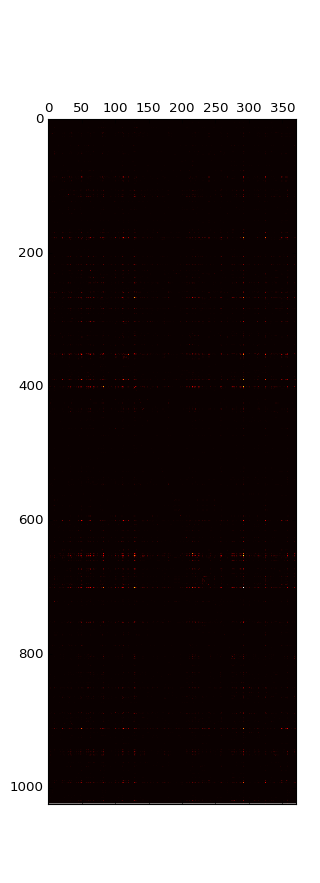

In [113]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np



nparray = df.as_matrix()

plt.matshow(nparray, cmap='hot', interpolation='none') # when more data, try without interpolation

In [280]:
columns = ['a', 'b', 'c']
df = pd.DataFrame([[1, 0, 1], [0, 1, 0], [3, 5, 2]], index=columns, columns=columns)
print(df)

print(np.arange(3))
df.values[[np.arange(len(columns))]*2] -= 1
print(df)

print('-------------')
a = df.index[(df != 0)['c']]
for i in a:
    print(i, type(i))


   a  b  c
a  1  0  1
b  0  1  0
c  3  5  2
[0 1 2]
   a  b  c
a  0  0  1
b  0  0  0
c  3  5  1
-------------
a <class 'str'>
c <class 'str'>


In [378]:
a=[1,2,3,1,3,2,1,1]
a = [4 if x==1 else x for x in a]
print(a)

[4, 2, 3, 4, 3, 2, 4, 4]
